# MULTIPLE LINEAR REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import LinearSVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Admission_Predict_Ver1.1.csv')

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
data.drop(columns=['Serial No.'],inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [6]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [8]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

###  checking OUTLIER

In [9]:
univariate_list = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA','Chance of Admit ']

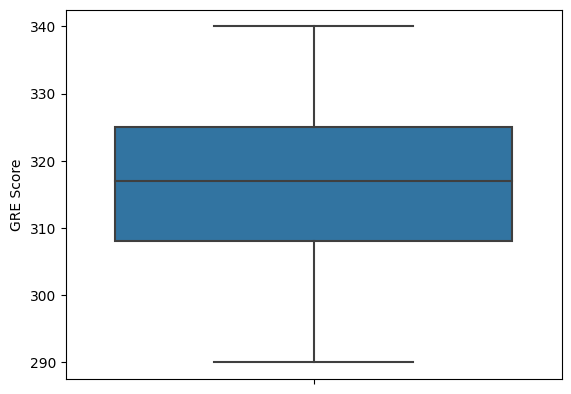

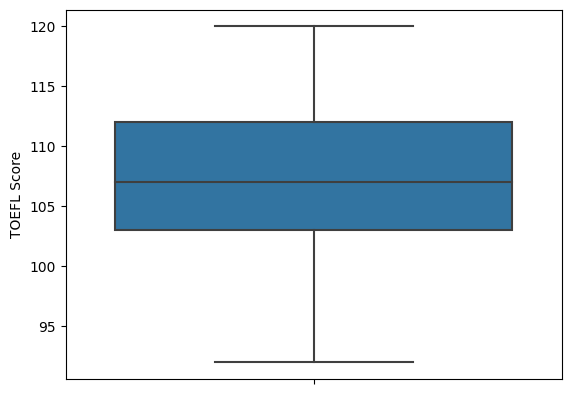

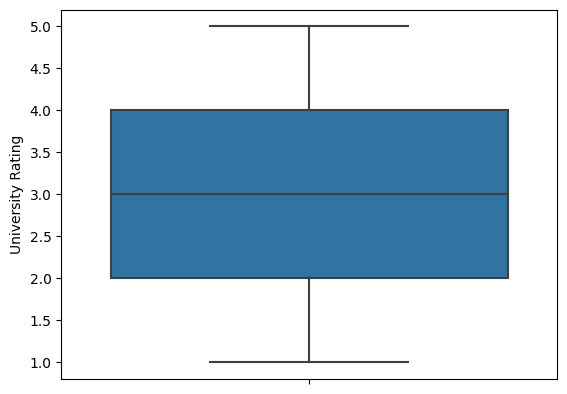

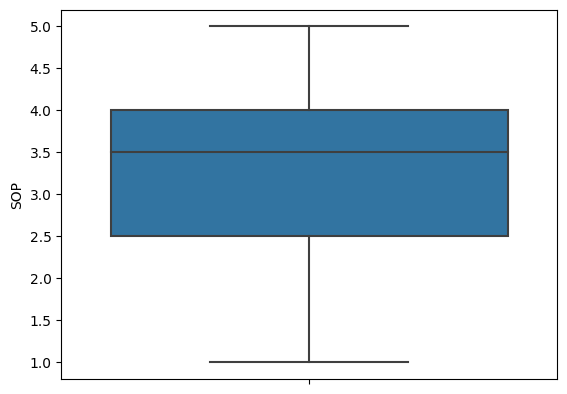

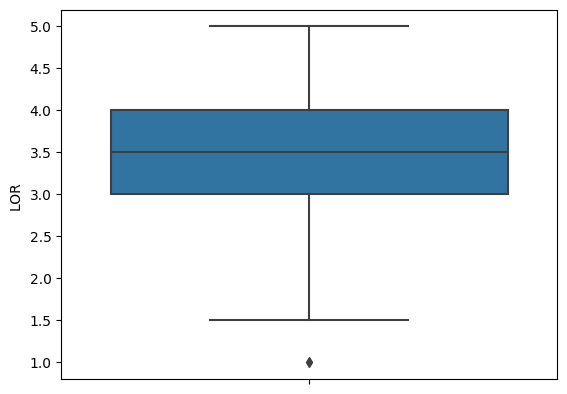

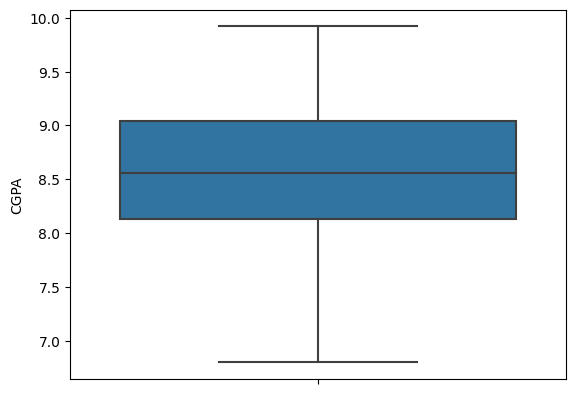

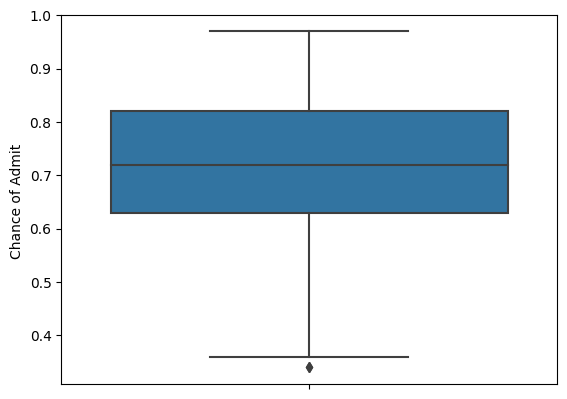

In [10]:
for i in univariate_list:
    sns.boxplot(y =data[i])
    plt.show()

### OUTLIER TREATMENT USING IQR METHOD

In [11]:
def outlater_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [12]:
UL,LL=outlater_limit(data['LOR '])
data['LOR ']=np.where((data['LOR ']>UL) | (data['LOR ']<LL),np.nan,data['LOR '])

In [13]:
UL,LL=outlater_limit(data['Chance of Admit '])
data['Chance of Admit ']=np.where((data['Chance of Admit ']>UL) | (data['Chance of Admit ']<LL),np.nan,data['Chance of Admit '])

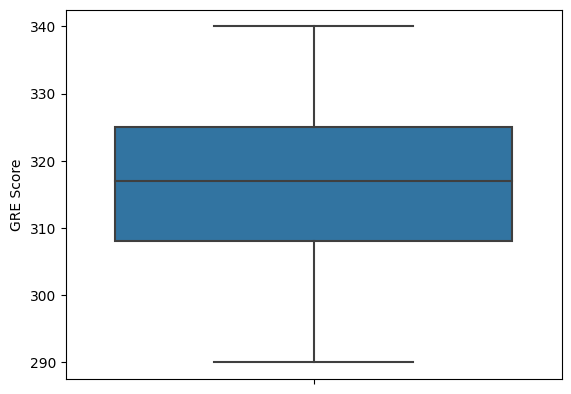

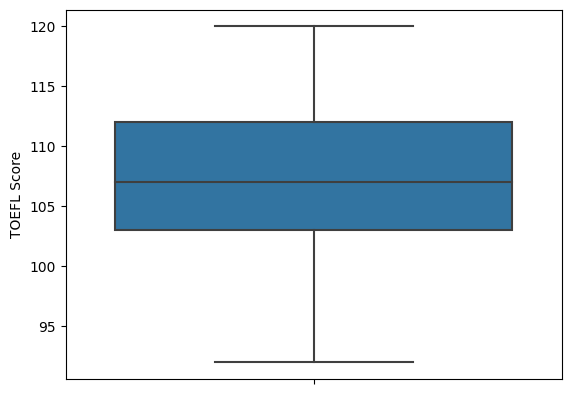

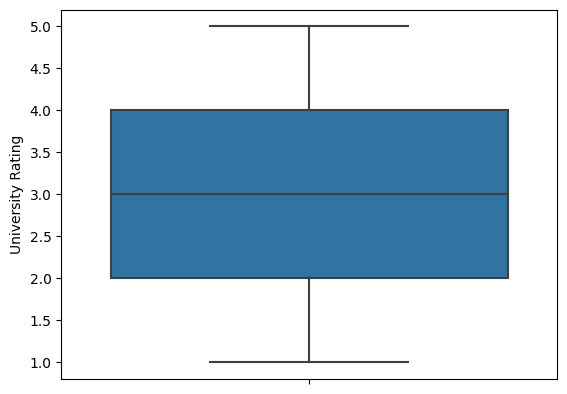

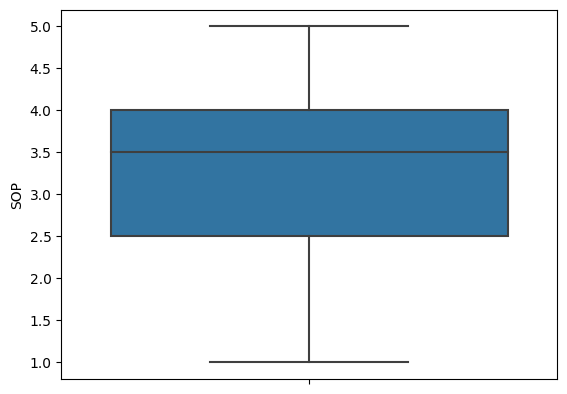

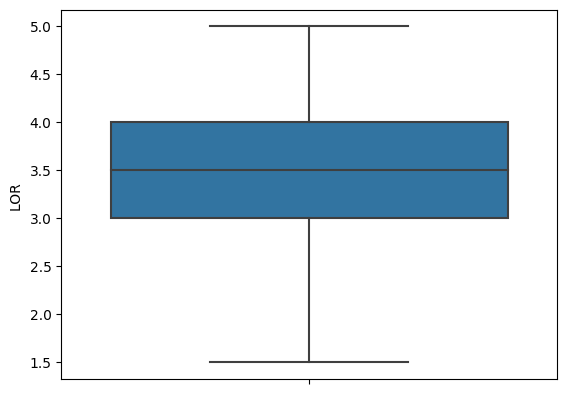

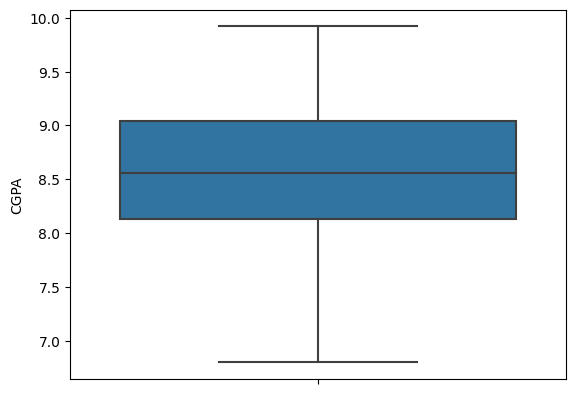

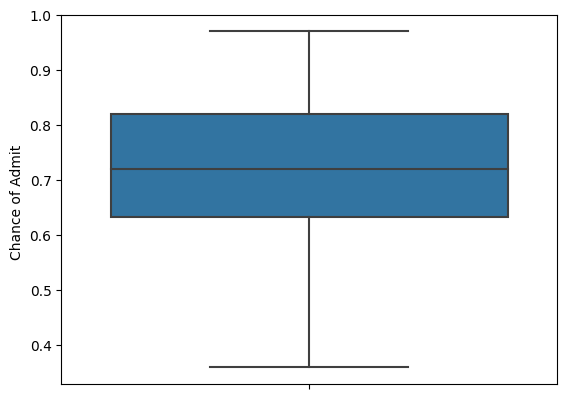

In [14]:
for i in univariate_list:
    sns.boxplot(y =data[i])
    plt.show()

##### OUTLIER treated

### Explaratory data analysis
#### Univariate analysis
##### Histogram


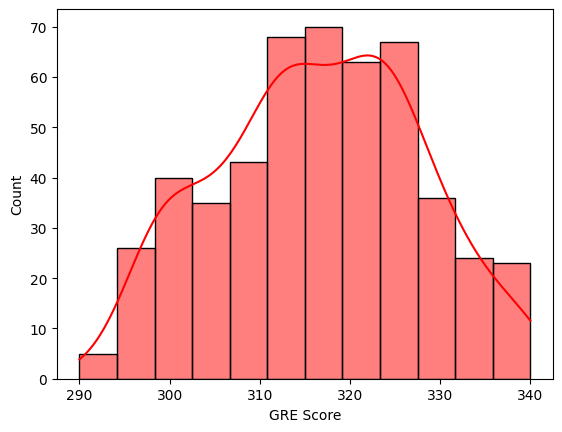

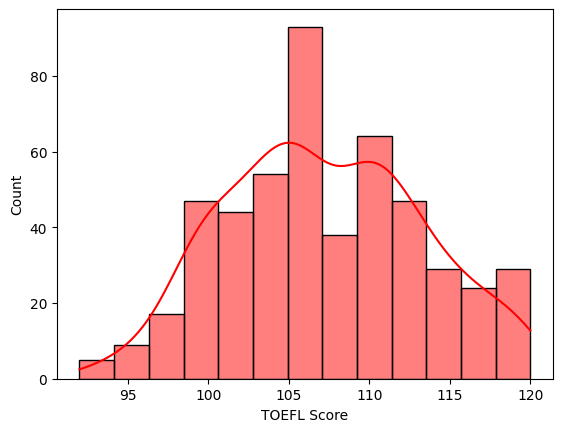

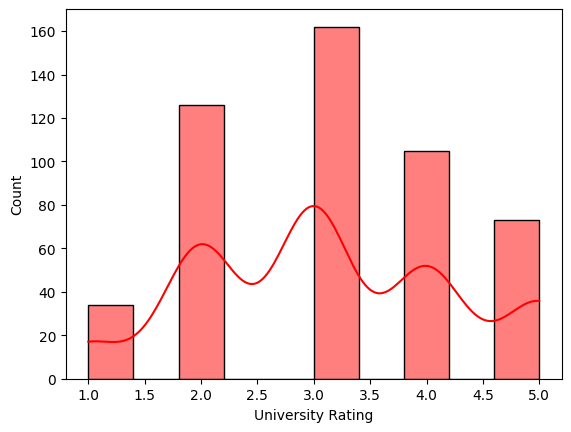

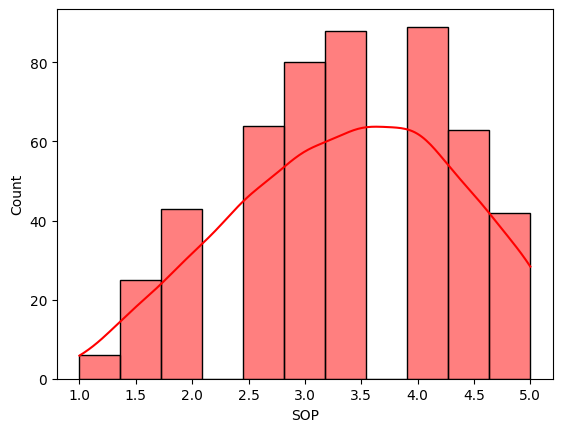

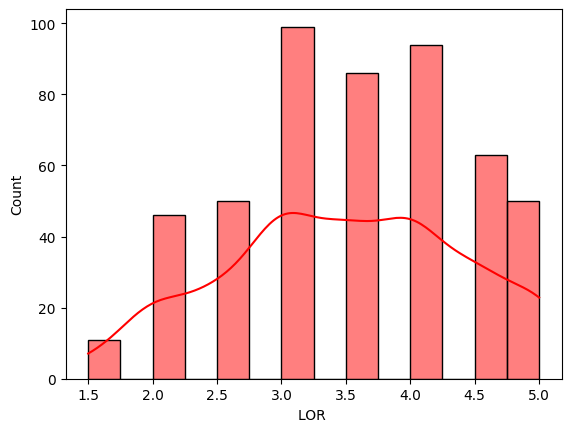

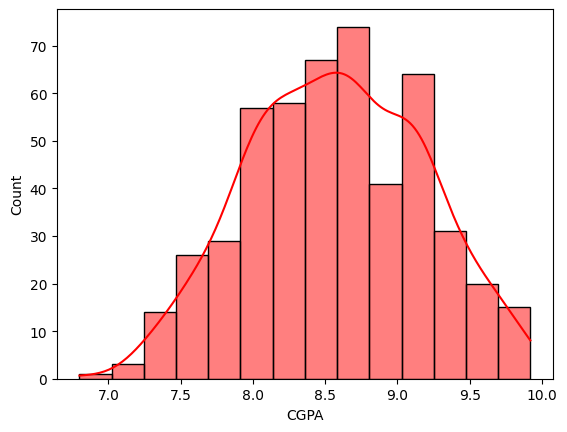

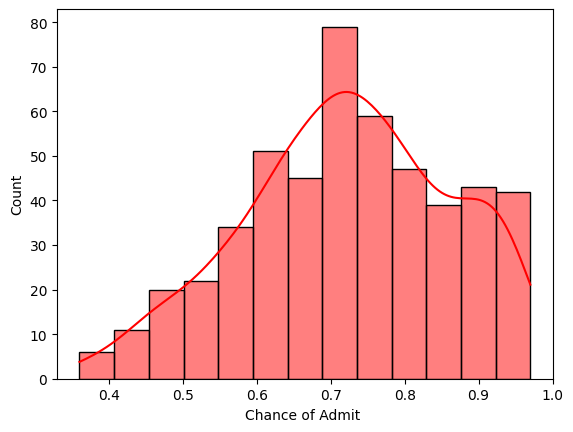

In [15]:
for i in univariate_list:
    sns.histplot(x =data[i],kde=True,color='red')
    plt.show()

In [16]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

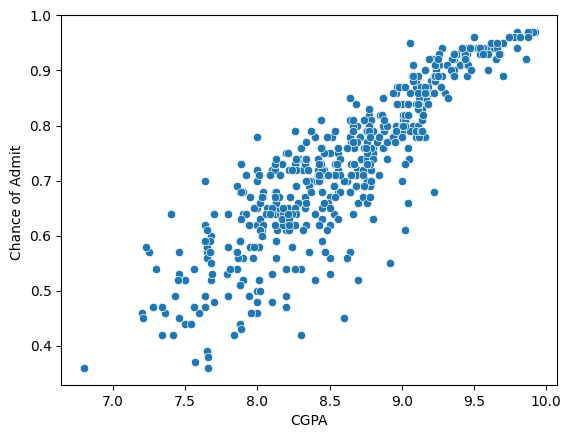

In [17]:
sns.scatterplot(data=data,x='CGPA',y='Chance of Admit ')
plt.show()

<Axes: >

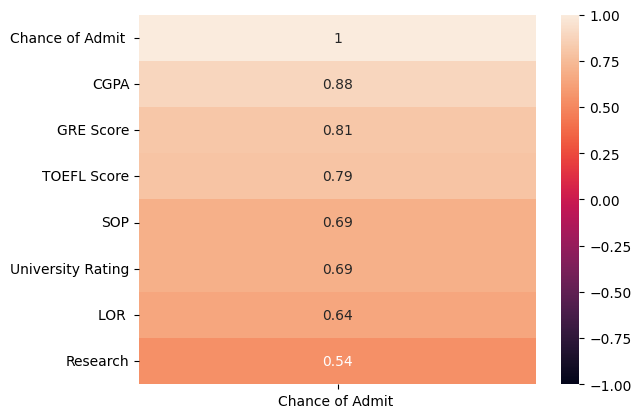

In [18]:
sns.heatmap(data.corr()[['Chance of Admit ']].sort_values(by='Chance of Admit ',ascending=False),vmin=-1,vmax=1,annot=True)

#### rearrange columns

In [19]:
data=data[['Research','University Rating', 'SOP', 'LOR ','TOEFL Score','GRE Score','CGPA', 'Chance of Admit ']]

In [20]:
data

,Research,University Rating,SOP,LOR,TOEFL Score,GRE Score,CGPA,Chance of Admit
0,1,4,4.5,4.5,118,337,9.65,0.92
1,1,4,4.0,4.5,107,324,8.87,0.76
2,1,3,3.0,3.5,104,316,8.00,0.72
3,1,3,3.5,2.5,110,322,8.67,0.80
4,0,2,2.0,3.0,103,314,8.21,0.65
...,...,...,...,...,...,...,...,...
495,1,5,4.5,4.0,108,332,9.02,0.87
496,1,5,5.0,5.0,117,337,9.87,0.96
497,1,5,4.5,5.0,120,330,9.56,0.93
498,0,4,4.0,5.0,103,312,8.43,0.73


### selecting features and targets

In [21]:
x=data.iloc[:,4:7].values
y=data.iloc[:,-1].values

In [49]:
x

array([[ 1.77886545,  1.81923762,  1.77680627],
       [-0.03160087,  0.66714832,  0.48585943],
       [-0.52536441, -0.0418297 , -0.95404281],
       ...,
       [ 2.10804114,  1.19888185,  1.62785086],
       [-0.68995225, -0.39631872, -0.24236699],
       [ 0.95592621,  0.93301508,  0.76721964]])

### feature scaling

In [22]:
sc=StandardScaler()

In [23]:
x=sc.fit_transform(x)

####  encountered indicates that the input y (the target variable) contains NaN (missing) values. This error occurs because scikit-learn's models cannot handle missing values by default.


In [24]:
missing_indices = np.isnan(y)

In [25]:
y[missing_indices] = np.nanmean(y)

#### spliting the data into training and testing sets

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)


#### creating dictionary of models for itrative purpose 

In [43]:
models={"linearRegression":LinearRegression(),
       "Ridge":Ridge(),
       "Lasso":Lasso(),
       "LinearSVR":LinearSVR(),
       "DecisionTreeRegressor":DecisionTreeRegressor(),
       "AdaBoostRegressor":AdaBoostRegressor(),
       "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

#### using for loop for model training and testing

In [45]:
for name, model in models.items():
    model.fit(x_train,y_train)
    print("model trained with{}".format(name))
    training_score=model.score(x_train,y_train)*100
    testing_score=model.score(x_test,y_test)*100
    score=r2_score(y_test,model.predict(x_test))*100
    mae=mean_absolute_error(y_test,model.predict(x_test))
    mse=mean_squared_error(y_test,model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2_score: ",score)
    print("training_score: ",training_score)
    print("testing_score: ",testing_score)
    print("mae: ",mae)
    print("mse: ",mse)
    print("rmse: ",rmse)
    print("*"*100)
    

model trained withlinearRegression
r2_score:  79.68855247464309
training_score:  79.6803768083779
testing_score:  79.68855247464309
mae:  0.045115251916222954
mse:  0.004153691018935488
rmse:  0.06444913512946072
****************************************************************************************************
model trained withRidge
r2_score:  79.65879494748548
training_score:  79.67992538843134
testing_score:  79.65879494748548
mae:  0.04513238158034106
mse:  0.004159776433239221
rmse:  0.06449632883536256
****************************************************************************************************
model trained withLasso
r2_score:  -0.9709857241043673
training_score:  0.0
testing_score:  -0.9709857241043673
mae:  0.11657461847389557
mse:  0.020648566580579345
rmse:  0.14369609104140357
****************************************************************************************************
model trained withLinearSVR
r2_score:  78.44155295561472
training_score:  79.3585542273719

### reg ploting result

Model trained with linearRegression


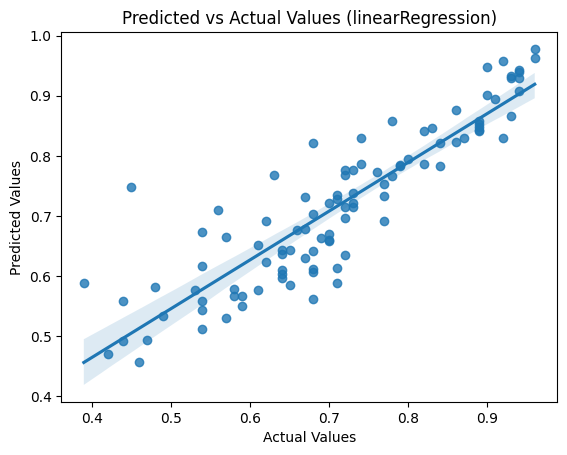

****************************************************************************************************
Model trained with Ridge


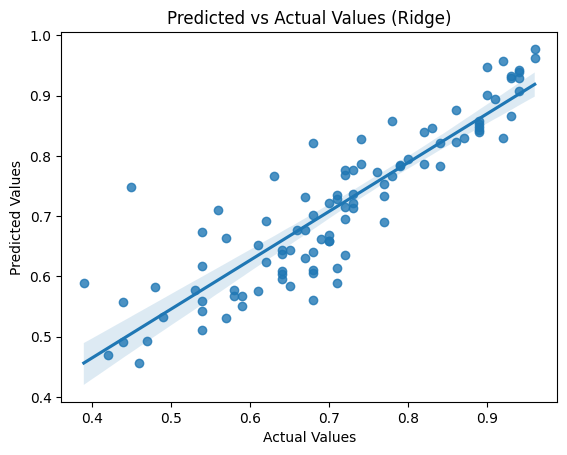

****************************************************************************************************
Model trained with Lasso


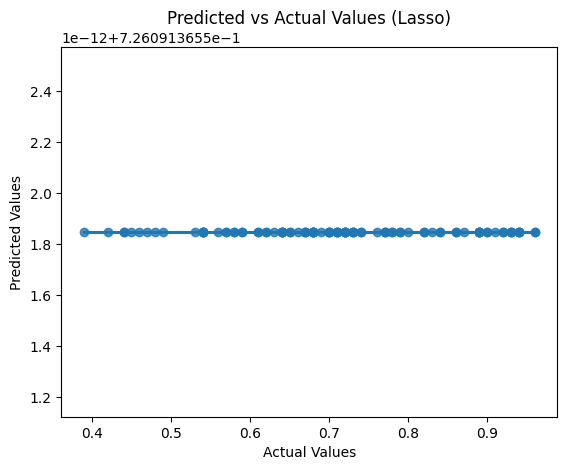

****************************************************************************************************
Model trained with LinearSVR


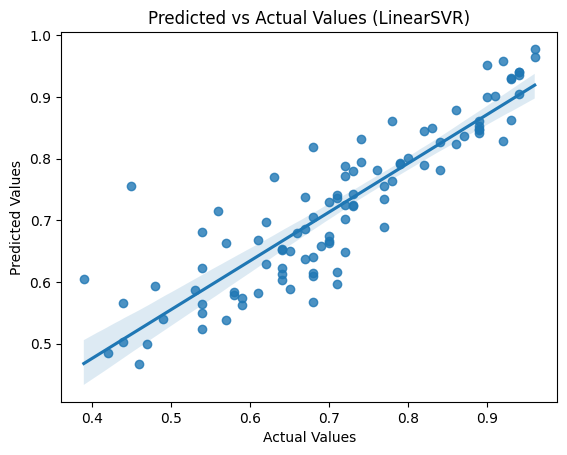

****************************************************************************************************
Model trained with DecisionTreeRegressor


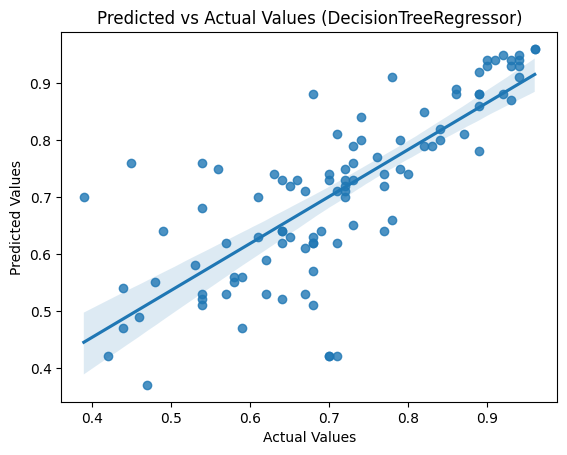

****************************************************************************************************
Model trained with AdaBoostRegressor


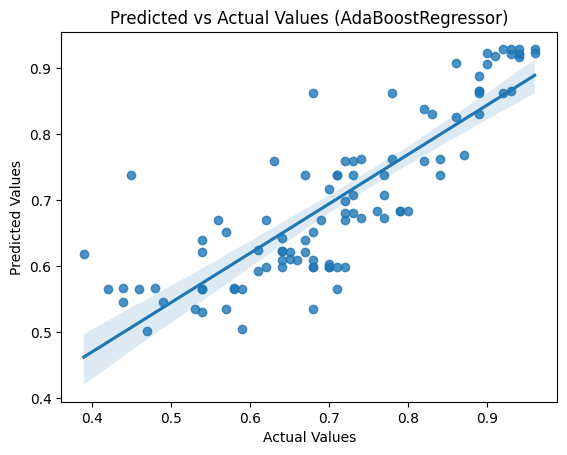

****************************************************************************************************
Model trained with RandomForestRegressor


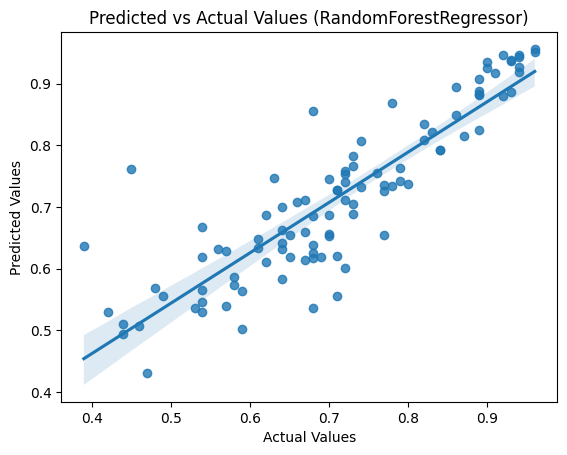

****************************************************************************************************


In [44]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("Model trained with {}".format(name))
    y_pred = model.predict(x_test)
    sns.regplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs Actual Values ({})".format(name))
    plt.show()    
    print("*" * 100)


### data frame creation with results

In [29]:
import pandas as pd

# Create an empty DataFrame
results_df = pd.DataFrame(columns=['Model', 'Actual', 'Predicted'])

for name, model in models.items():
    model.fit(x_train, y_train)
    print("Model trained with {}".format(name))
    
    # Generate predictions
    y_pred = model.predict(x_test)
    
    # Create a DataFrame with actual and predicted values
    model_results = pd.DataFrame({'Model': name,
                                  'Actual': y_test,
                                  'Predicted': y_pred})
    
    # Append the model results to the main DataFrame
    results_df = results_df.append(model_results, ignore_index=True)
    
    # Print other metrics
    # ...
    
    print("*" * 100)

# Print the final results DataFrame
print(results_df)


Model trained with linearRegression
****************************************************************************************************
Model trained with Ridge
****************************************************************************************************
Model trained with Lasso
****************************************************************************************************
Model trained with LinearSVR
****************************************************************************************************
Model trained with DecisionTreeRegressor
****************************************************************************************************
Model trained with AdaBoostRegressor
****************************************************************************************************
Model trained with RandomForestRegressor
****************************************************************************************************
                     Model  Actual  Predicted
0         lin

In [30]:
results_df

,Model,Actual,Predicted
0,linearRegression,0.93,0.929134
1,linearRegression,0.84,0.783012
2,linearRegression,0.39,0.588071
3,linearRegression,0.77,0.733057
4,linearRegression,0.74,0.828927
...,...,...,...
695,RandomForestRegressor,0.42,0.530716
696,RandomForestRegressor,0.72,0.711013
697,RandomForestRegressor,0.72,0.754300
698,RandomForestRegressor,0.67,0.711100


## initializing the model > trained with linearRegression

In [31]:
model_01=LinearRegression()

predicting using the test data

In [32]:
model_01.fit(x_train,y_train)

LinearRegression()

In [33]:
y_pred=model_01.predict(x_test)

evaluating accuracy between y_test and predicted y (r2_score)

In [34]:
r2_score(y_test,y_pred)

0.7968855247464309

In [35]:
#testing accuracy

model.score(x_test,y_test)

0.7758297834823872

In [36]:
#training accuracy

model.score(x_train,y_train)

0.9651243492002335

In [37]:
#mean absolute error

mean_absolute_error(y_test,y_pred)

0.045115251916222954

In [38]:
#mean squread error

mean_squared_error(y_test,y_pred)

0.004153691018935488

In [39]:
#root mean squread error

np.sqrt(mean_squared_error(y_test,y_pred))

0.06444913512946072

In [40]:
#creating data frames with y test y pred

OUTPUT=pd.DataFrame(zip(y_test,y_pred),columns=['ACTUAL','PREDICTION'])

In [41]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,0.93,0.929134
1,0.84,0.783012
2,0.39,0.588071
3,0.77,0.733057
4,0.74,0.828927


### PLOTTING RESULTS

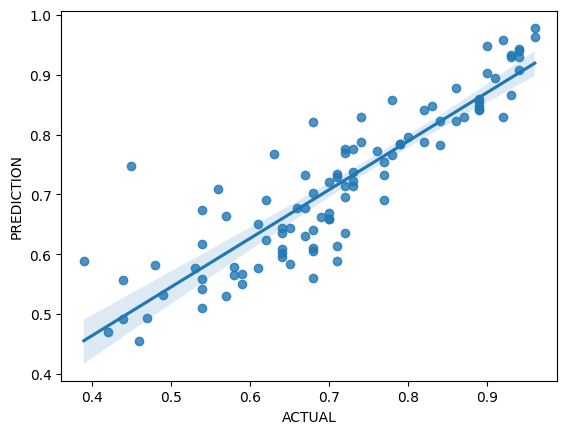

In [42]:
sns.regplot(data=OUTPUT,x='ACTUAL',y='PREDICTION')
plt.show()